In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_style("white")

# Linear Regression example

In [2]:
price = np.array([7,20,13,59,40,51,37])
review_score = np.array([7,6,8,1,3,2,3])

**I. Mean**

In [3]:
type(price)

numpy.ndarray

In [4]:
price.mean()

32.42857142857143

In [5]:
review_score.mean()

4.285714285714286

**II. Variance**

In [6]:
ddof = 1

In [9]:
price.var(ddof=ddof)

384.61904761904754

In [10]:
review_score.var(ddof=ddof)

7.238095238095238

**III. Standard Deviation**

In [11]:
price.std(ddof=ddof)

19.611706902231827

In [14]:
np.sqrt(price.var(ddof=ddof))

19.611706902231827

In [12]:
review_score.std(ddof=ddof)

2.690370836538197

In [15]:
np.sqrt(review_score.var(ddof=ddof))

2.690370836538197

**IV. Covariance**

In [17]:
cov = np.cov(price, review_score, ddof=ddof)
cov

array([[384.61904762, -51.30952381],
       [-51.30952381,   7.23809524]])

In [19]:
cov[1,0]

-51.3095238095238

**V. Correlation (Pearson)**

In [20]:
cov[0,1] / np.sqrt(price.var(ddof=ddof) * review_score.var(ddof=ddof))

-0.9724570819188173

In [22]:
corr = np.corrcoef(price, review_score)
corr

array([[ 1.        , -0.97245708],
       [-0.97245708,  1.        ]])

In [23]:
corr[0,1]

-0.9724570819188174

**VI. Regression Coefficient**

In [24]:
# manually
beta_1 = cov[1,0] / price.var(ddof=ddof)
beta_1

-0.13340349139532007

In [26]:
beta_0 = review_score.mean() - beta_1 * price.mean()
beta_0

8.611798935248236

In [27]:
# using statsmodels
df = pd.DataFrame({"y": review_score, "x": price})
df

,y,x
0,7,7
1,6,20
2,8,13
3,1,59
4,3,40
5,2,51
6,3,37


In [29]:
# add a constant
df = sm.add_constant(df)

In [30]:
lin_reg = sm.OLS(df["y"],
                 df[["const", "x"]]).fit()

In [33]:
type(lin_reg)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [43]:
lin_reg.summary()

/Users/at/miniconda3/envs/backpack_banana/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     87.03
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           0.000238
Time:                        15:36:10   Log-Likelihood:                -6.1262
No. Observations:                   7   AIC:                             16.25
Df Residuals:                       5   BIC:                             16.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6118      0.531     16.204      0.000       7.246       9.978
x             -0.1334      0.014     -9.329      0.000      -0.170      -0.097
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.559
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.457
Skew:                           0.582   Prob(JB):                        0.796
Kurtosis:                       2.539   Cond. No.                         76.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For increase in price by 1 EUR, our review_score decreases by 0.1334

In [37]:
df = df.assign(y_hat=lin_reg.predict(df[["const", "x"]]))
df

,const,y,x,y_hat
0,1.0,7,7,7.677974
1,1.0,6,20,5.943729
2,1.0,8,13,6.877554
3,1.0,1,59,0.740993
4,1.0,3,40,3.275659
5,1.0,2,51,1.808221
6,1.0,3,37,3.675870


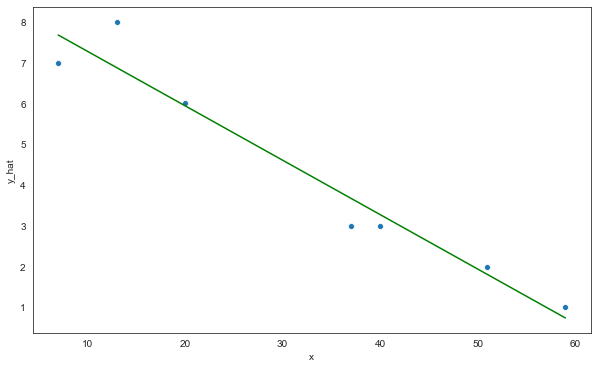

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df,
                x="x",
                y="y",
                ax=ax);

sns.lineplot(data=df,
             x="x",
             y="y_hat",
             color="green",
             ax=ax);

# Olist Linear Regression

In [44]:
import mysql_connection as mc

In [45]:
conn = mc.connect()

Please insert your password:········


In [49]:
query = """
SELECT
    o.order_id,
    dor.review_score,
    DATEDIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_purchase_timestamp)) AS estimated_delivery_days,
    DATEDIFF(DATE(o.order_delivered_customer_date), DATE(o.order_purchase_timestamp)) AS actual_delivery_days,
    DATEDIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_purchase_timestamp))
    - DATEDIFF(DATE(o.order_delivered_customer_date), DATE(o.order_purchase_timestamp)) AS delivery_diff,
    oid.total_price,
    oid.shipping_costs,
    oid.order_size,
    oid.has_product_photo,
    oid.has_product_decription AS has_product_description
FROM orders o
    JOIN temp_dedup_order_reviews dor
    ON o.order_id = dor.order_id
    JOIN temp_order_item_details oid
    ON o.order_id = oid.order_id
WHERE o.order_status = 'delivered';
"""

review_score = pd.read_sql(query, conn)

In [50]:
review_score

,order_id,review_score,estimated_delivery_days,actual_delivery_days,delivery_diff,total_price,shipping_costs,order_size,has_product_photo,has_product_description
0,e481f51cbdc54678b7cc49136f2d6af7,4,16,8.0,8.0,29.990000,8.720000,1,1.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,4,20,14.0,6.0,118.699997,22.760000,1,1.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,5,27,9.0,18.0,159.899994,19.219999,1,1.0,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,5,27,14.0,13.0,45.000000,27.200001,1,1.0,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,5,13,3.0,10.0,19.900000,8.720000,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,5,19,8.0,11.0,72.000000,13.080000,1,1.0,1.0
96474,63943bddc261676b46f01ca7ac2f7bd8,4,24,22.0,2.0,174.899994,20.100000,1,1.0,1.0
96475,83c1379a015df1e13d02aae0204711ab,5,31,25.0,6.0,205.990005,65.019997,1,1.0,1.0
96476,11c177c8e97725db2631073c19f07b62,2,38,17.0,21.0,359.980011,81.180000,2,2.0,2.0


# 1st Model: Do the review scores correlate with delivery_diff?

Run linear regression

In [52]:
# add constant
review_score = sm.add_constant(review_score)

In [55]:
# drop inf values
review_score = review_score.replace([np.inf, -np.inf], np.nan).dropna()

In [56]:
rev_y = review_score["review_score"]
rev_X = review_score[["const", "delivery_diff"]]

rev_lr = sm.OLS(rev_y, rev_X).fit()

In [57]:
rev_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7554.
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:51:36   Log-Likelihood:            -1.5817e+05
No. Observations:               96470   AIC:                         3.163e+05
Df Residuals:                   96468   BIC:                         3.164e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.7377      0.006    606.021      0.000       3.726       3.750
delivery_diff     0.0343      0.000     86.916      0.000       0.033       0.035
==============================================================================
Omnibus:                    19324.613   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33264.195
Skew:                          -1.349   Prob(JB):                         0.00
Kurtosis:                       3.998   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2nd model: review_score as a function of multiple regressors

Add shipping costs

In [58]:
rev_y2 = review_score["review_score"]
rev_X2 = review_score[["const", "delivery_diff", "shipping_costs"]]

rev_lr2 = sm.OLS(rev_y2, rev_X2).fit()

In [59]:
rev_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     4394.
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:56:04   Log-Likelihood:            -1.5760e+05
No. Observations:               96470   AIC:                         3.152e+05
Df Residuals:                   96467   BIC:                         3.152e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.8728      0.007    529.288      0.000       3.858       3.887
delivery_diff      0.0349      0.000     88.992      0.000       0.034       0.036
shipping_costs    -0.0063      0.000    -33.831      0.000      -0.007      -0.006
==============================================================================
Omnibus:                    18892.135   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32351.720
Skew:                          -1.312   Prob(JB):                         0.00
Kurtosis:                       4.078   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3rd model

In [62]:
review_score = review_score.assign(picture_ratio=review_score["has_product_photo"] / review_score["order_size"])

rev_y3 = review_score["review_score"]
rev_X3 = review_score[["const", "delivery_diff", "shipping_costs", "actual_delivery_days", "picture_ratio"]]

rev_lr3 = sm.OLS(rev_y3, rev_X3).fit()

- delivery_diff: +
- shipping_costs: -
- actual_delivery_days: -
- picture_ratio: +

In [63]:
rev_lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     3347.
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:01:16   Log-Likelihood:            -1.5554e+05
No. Observations:               96470   AIC:                         3.111e+05
Df Residuals:                   96465   BIC:                         3.111e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3540      0.035    125.099      0.000       4.286       4.422
delivery_diff            0.0149      0.000     30.356      0.000       0.014       0.016
shipping_costs          -0.0033      0.000    -17.412      0.000      -0.004      -0.003
actual_delivery_days    -0.0345      0.001    -64.826      0.000      -0.035      -0.033
picture_ratio            0.1198      0.033      3.594      0.000       0.054       0.185
==============================================================================
Omnibus:                    19215.005   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35178.885
Skew:                          -1.259   Prob(JB):                         0.00
Kurtosis:                       4.553   Cond. No.                         420.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:

- Shipping costs: For each increase of shipping_costs by 1 unit (1 Rio), the review_score decreases by 0.0033, c.p. (ceteris paribus): holding everything else constant

- Actual Delivery Days: For each additional delivery day, the review score decreses by 0.0345, holding everything else constant.